# Importing libraries

In [3]:
# Import Libraries and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Configure GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPU available: {len(gpus)} GPU(s)")
    except RuntimeError as e:
        print(e)
else:
    print("GPU not available, using CPU")

Libraries imported successfully!
TensorFlow version: 2.19.0
GPU not available, using CPU


# Load and Explore Data

In [6]:
# Load the Cairo weather dataset
df = pd.read_csv(r'D:\bibAlex-Hackathon-TeamX\data\Cairo-Weather.csv')
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Drop multiple columns
columns_to_drop = ['visibility_mean (undefined)', 'visibility_min (undefined)', 'visibility_max (undefined)', 'snowfall_sum (cm)', 'sunrise (iso8601)', 'sunset (iso8601)']

# Check data types and convert datetime if needed
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])  # Convert to datetime
    df.drop(columns=columns_to_drop, inplace=True)    # Drop the original time column

print("\nData types after processing:")
print(df.dtypes)

# Optional: Preview to confirm
print("\nFirst few rows after converting 'time':")
print(df.head())

Dataset shape: (5845, 32)

Column names: ['time', 'temperature_2m_mean (°C)', 'rain_sum (mm)', 'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)', 'temperature_2m_min (°C)', 'temperature_2m_max (°C)', 'apparent_temperature_max (°C)', 'weather_code (wmo code)', 'wind_direction_10m_dominant (°)', 'wind_gusts_10m_max (km/h)', 'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)', 'sunshine_duration (s)', 'apparent_temperature_min (°C)', 'sunrise (iso8601)', 'sunset (iso8601)', 'precipitation_hours (h)', 'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)', 'snowfall_sum (cm)', 'cloud_cover_mean (%)', 'dew_point_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'visibility_mean (undefined)', 'visibility_max (undefined)', 'visibility_min (undefined)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'winddirection_10m_dominant (°)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)']

First few rows:
       time  temperature_2m_mean (°C)  rain_sum (mm) 

# Data Visualization

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),wind_gusts_10m_max (km/h),shortwave_radiation_sum (MJ/m²),daylight_duration (s),sunshine_duration (s),apparent_temperature_min (°C),precipitation_hours (h),precipitation_sum (mm),et0_fao_evapotranspiration (mm),cloud_cover_mean (%),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2009-02-01,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,27.7,16.92,38792.64,35403.46,4.7,0,0.0,3.57,0,0.7,42,17.1,8.8,215,10.8,5.7
1,2009-02-02,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,24.1,17.19,38879.40,35479.76,3.4,0,0.0,3.61,0,1.1,45,15.1,7.5,74,7.9,1.1
2,2009-02-03,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,41.4,17.27,38967.86,35570.21,6.3,0,0.0,4.69,3,2.4,43,27.8,15.0,65,17.3,9.0
3,2009-02-04,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,31.3,17.70,39057.90,35614.48,8.4,0,0.0,3.76,32,4.0,46,18.9,8.8,90,9.7,0.4
4,2009-02-05,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,31.3,17.80,39149.40,35718.27,7.8,0,0.0,4.68,0,-1.6,31,19.9,10.0,222,11.9,6.5



Shape: (5845, 26)
✅ Columns for display: ['time', 'temperature_2m_mean (°C)', 'rain_sum (mm)', 'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)', 'temperature_2m_min (°C)', 'temperature_2m_max (°C)', 'apparent_temperature_max (°C)', 'weather_code (wmo code)', 'wind_direction_10m_dominant (°)', 'wind_gusts_10m_max (km/h)', 'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)', 'sunshine_duration (s)', 'apparent_temperature_min (°C)', 'precipitation_hours (h)', 'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)', 'cloud_cover_mean (%)', 'dew_point_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'winddirection_10m_dominant (°)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)']
🔢 Total numeric columns (excluding 'time'): 26


,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),wind_gusts_10m_max (km/h),shortwave_radiation_sum (MJ/m²),daylight_duration (s),sunshine_duration (s),apparent_temperature_min (°C),precipitation_hours (h),precipitation_sum (mm),et0_fao_evapotranspiration (mm),cloud_cover_mean (%),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2009-02-01,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,27.7,16.92,38792.64,35403.46,4.7,0,0.0,3.57,0,0.7,42,17.1,8.8,215,10.8,5.7
1,2009-02-02,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,24.1,17.19,38879.40,35479.76,3.4,0,0.0,3.61,0,1.1,45,15.1,7.5,74,7.9,1.1
2,2009-02-03,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,41.4,17.27,38967.86,35570.21,6.3,0,0.0,4.69,3,2.4,43,27.8,15.0,65,17.3,9.0
3,2009-02-04,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,31.3,17.70,39057.90,35614.48,8.4,0,0.0,3.76,32,4.0,46,18.9,8.8,90,9.7,0.4
4,2009-02-05,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,31.3,17.80,39149.40,35718.27,7.8,0,0.0,4.68,0,-1.6,31,19.9,10.0,222,11.9,6.5


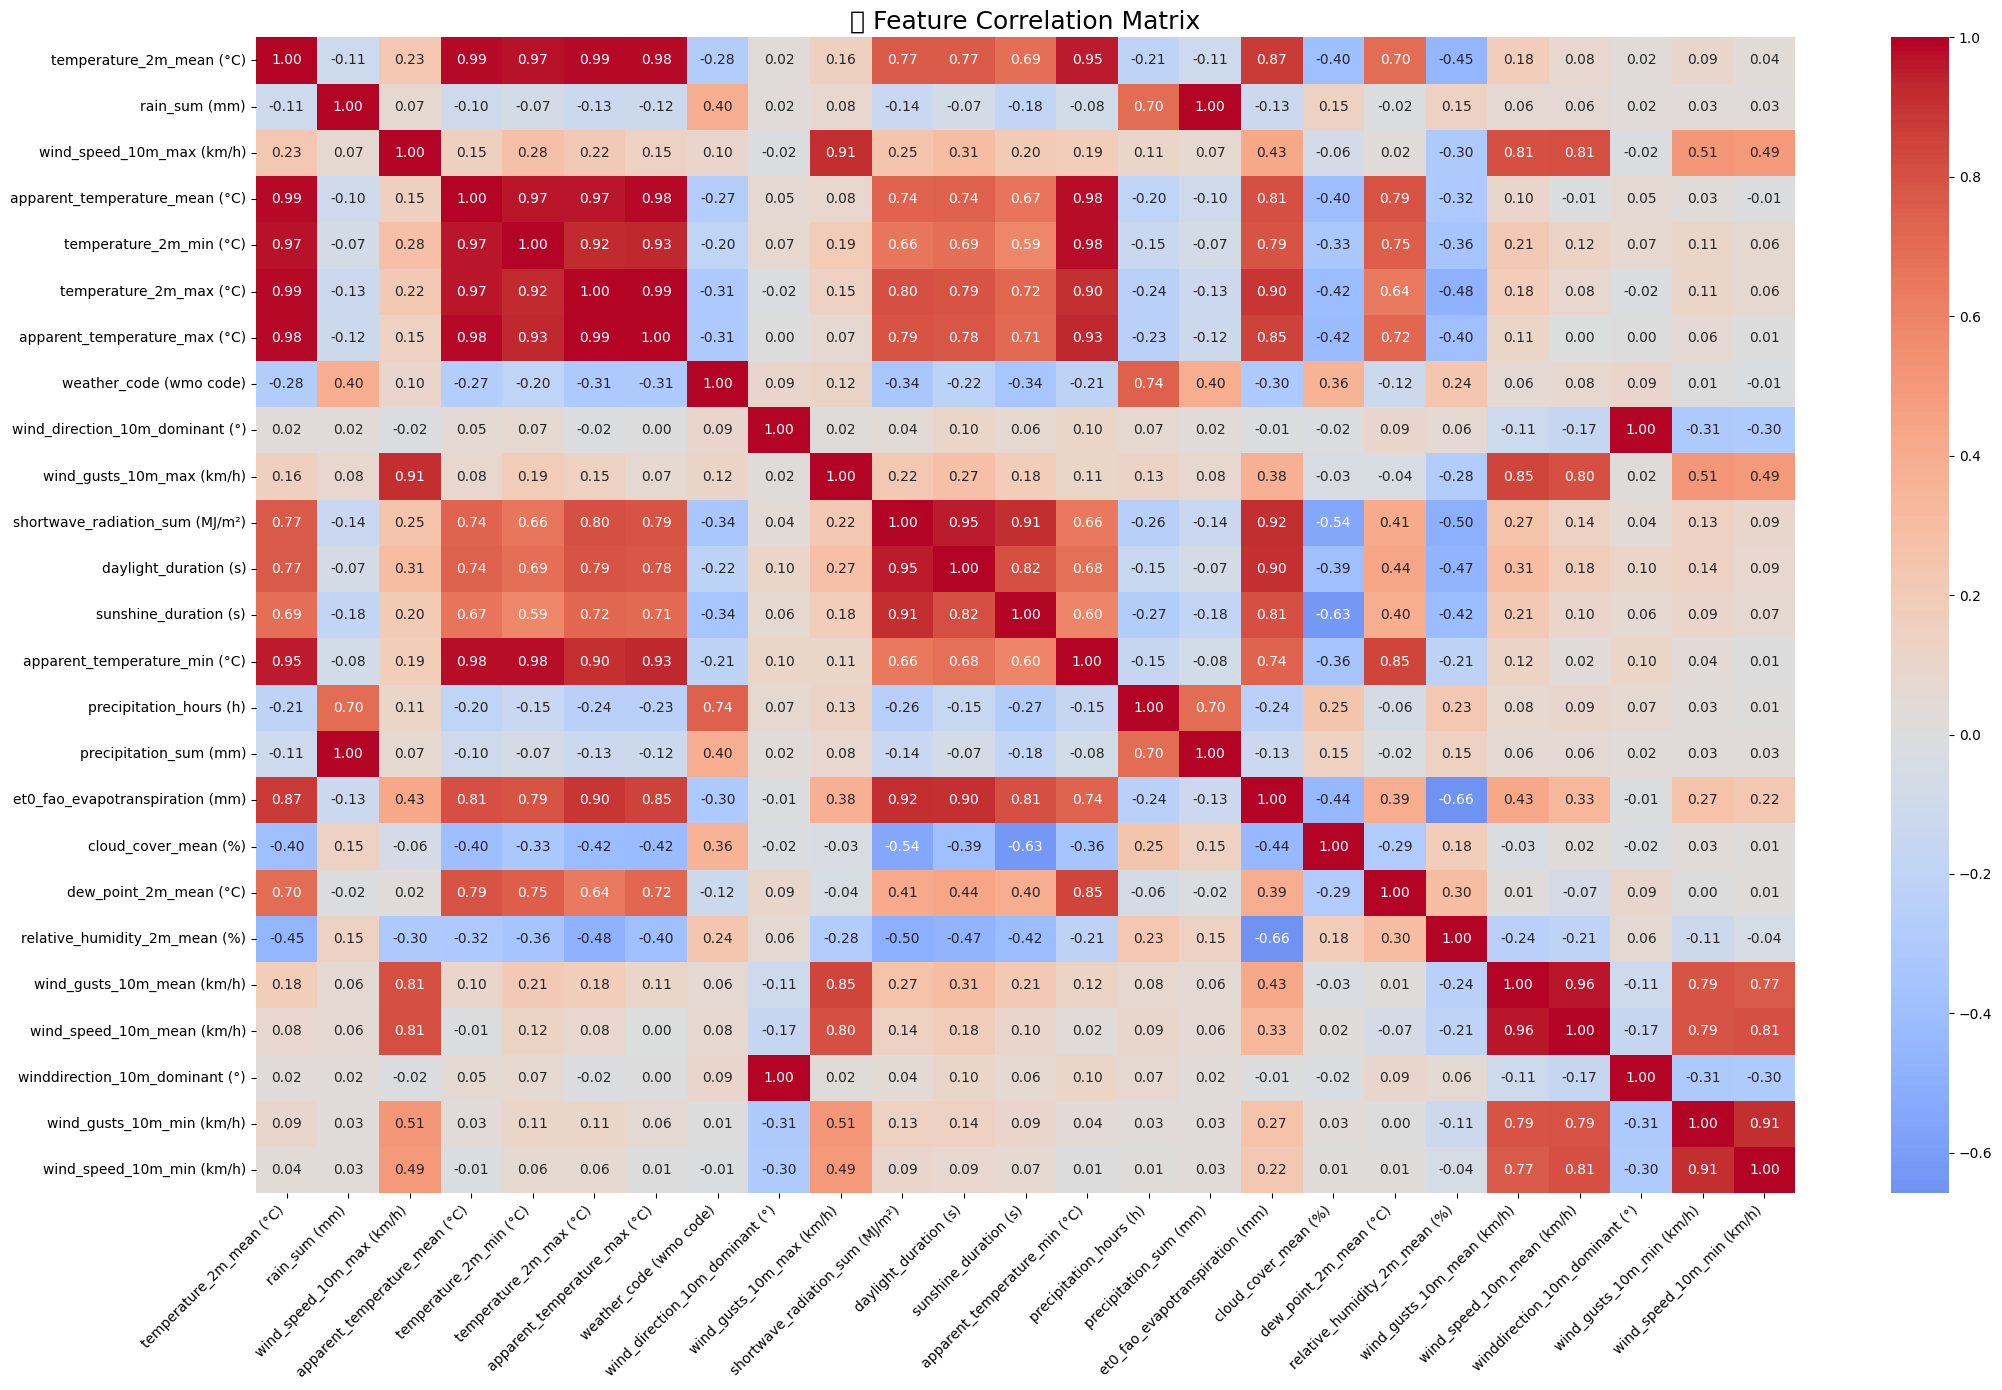

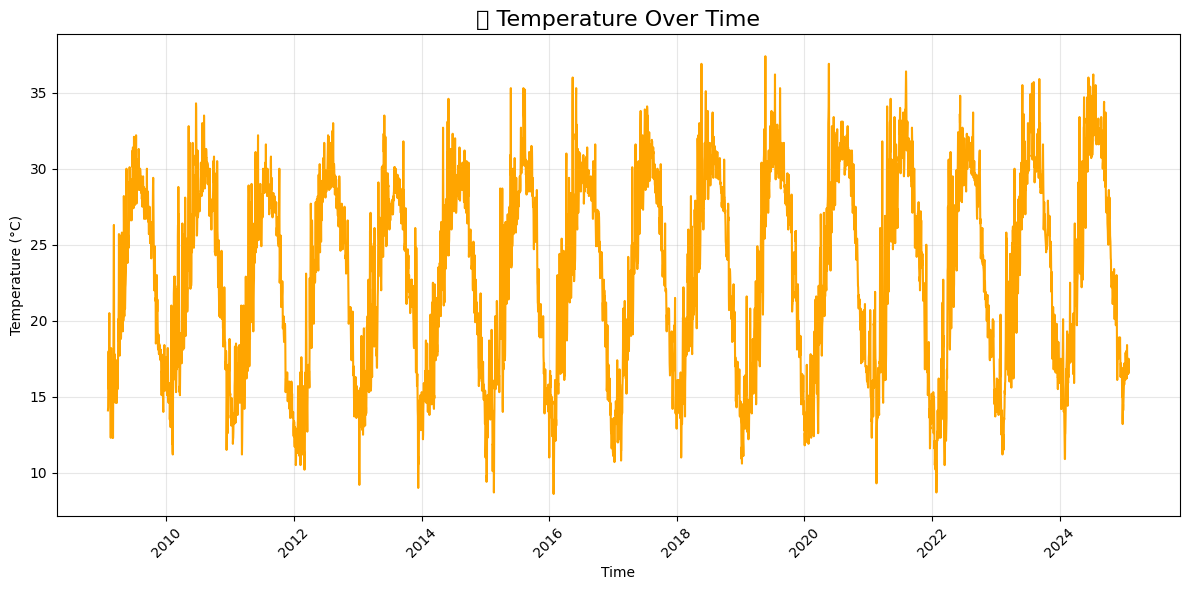

📋 Data types summary:
float64           19
int64              6
datetime64[ns]     1
Name: count, dtype: int64

🧠 Column types:
datetime64[ns]: ['time']
float64: ['temperature_2m_mean (°C)', 'rain_sum (mm)', 'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)', 'temperature_2m_min (°C)', 'temperature_2m_max (°C)', 'apparent_temperature_max (°C)', 'wind_gusts_10m_max (km/h)', 'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)', 'sunshine_duration (s)', 'apparent_temperature_min (°C)', 'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)', 'dew_point_2m_mean (°C)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)']
int64: ['weather_code (wmo code)', 'wind_direction_10m_dominant (°)', 'precipitation_hours (h)', 'cloud_cover_mean (%)', 'relative_humidity_2m_mean (%)', 'winddirection_10m_dominant (°)']


In [12]:
# Data Visualization

from IPython.display import display
import pandas as pd

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Now display full DataFrame (first few rows)
display(df.head())

# Show shape (rows, columns)
print(f"\nShape: {df.shape}")

# 1️⃣ Include 'time' in displayed list
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Add 'time' manually just for display
display_cols = ['time'] + numeric_cols
print(f"✅ Columns for display: {display_cols}")
print(f"🔢 Total numeric columns (excluding 'time'): {len(display_cols)}")

# Display first few rows of these columns
from IPython.display import display
display(df[display_cols].head())

# 2️⃣ Correlation Heatmap (numeric only)
if len(numeric_cols) > 1:
    plt.figure(figsize=(22, 14))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('📊 Feature Correlation Matrix', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3️⃣ Temperature vs Time Plot
plt.figure(figsize=(12, 6))
temp_col = 'temperature_2m_mean (°C)'
time_col = 'time'
if temp_col in df.columns and time_col in df.columns:
    df[time_col] = pd.to_datetime(df[time_col])
    df.sort_values(by=time_col, inplace=True)
    plt.plot(df[time_col], df[temp_col], color='orange', linewidth=1.5)
    plt.title('🌡️ Temperature Over Time', fontsize=16)
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Temperature or time column not found.")

print("📋 Data types summary:")
print(df.dtypes.value_counts())
print("\n🧠 Column types:")
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"{dtype}: {cols}")

# Date Preprocessing

In [13]:
def preprocess_weather_data(df, target_col='temperature_2m_mean (°C)', sequence_length=7):
    df_clean = df.copy()
    # Select numeric columns + time
    all_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    if 'time' in df_clean.columns:
        all_cols.append('time')  # Include datetime if not already present
    
    # Set feature columns (all except target)
    feature_cols = [col for col in all_cols if col != target_col]
    print(f"🎯 Target column: {target_col}")
    print(f"🧩 Feature columns: {feature_cols}")
    
    # Convert time to numeric (for modeling)
    if 'time' in df_clean.columns and not np.issubdtype(df_clean['time'].dtype, np.number):
        df_clean['time'] = df_clean['time'].astype('int64')  # Convert datetime64 to int
    print(df_clean['time'].head())
    
    # Scale
    scaler_features = StandardScaler()
    scaler_target = StandardScaler()
    scaled_features = scaler_features.fit_transform(df_clean[feature_cols])
    scaled_target = scaler_target.fit_transform(df_clean[[target_col]])
    
    return scaled_features, scaled_target.flatten(), scaler_features, scaler_target, feature_cols, target_col

# ✅ Sequence creation function (unchanged)
def create_sequences(features, target, sequence_length=7):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:(i + sequence_length)])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# ✅ Apply preprocessing and create sequences
target_column = 'temperature_2m_mean (°C)'
sequence_length = 7

scaled_features, scaled_target, scaler_features, scaler_target, feature_cols, target_col = preprocess_weather_data(
    df, target_col=target_column, sequence_length=sequence_length
)

X, y = create_sequences(scaled_features, scaled_target, sequence_length)

print(f"📐 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")
print(f"🔢 Sequence length: {sequence_length}")
print(f"📊 Number of features: {len(feature_cols)}")

# ✅ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

print(f"🧪 Training set shape: {X_train.shape}, {y_train.shape}")
print(f"🧾 Test set shape: {X_test.shape}, {y_test.shape}")

🎯 Target column: temperature_2m_mean (°C)
🧩 Feature columns: ['rain_sum (mm)', 'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)', 'temperature_2m_min (°C)', 'temperature_2m_max (°C)', 'apparent_temperature_max (°C)', 'weather_code (wmo code)', 'wind_direction_10m_dominant (°)', 'wind_gusts_10m_max (km/h)', 'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)', 'sunshine_duration (s)', 'apparent_temperature_min (°C)', 'precipitation_hours (h)', 'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)', 'cloud_cover_mean (%)', 'dew_point_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'winddirection_10m_dominant (°)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)', 'time']
0    1233446400000000000
1    1233532800000000000
2    1233619200000000000
3    1233705600000000000
4    1233792000000000000
Name: time, dtype: int64
📐 Feature matrix shape: (5838, 7, 25)
🎯 Target vector shape: (5838,)
🔢 Sequence l

# Saving the data for later use

In [15]:
import os
import joblib  # For saving scalers

# Define save paths
test_dir = r"D:\bibAlex-Hackathon-TeamX\data\test"
train_dir = r"D:\bibAlex-Hackathon-TeamX\data\train"

# Make sure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Save training and test sets
np.save(os.path.join(train_dir, "X_train.npy"), X_train)
np.save(os.path.join(train_dir, "y_train.npy"), y_train)
np.save(os.path.join(test_dir, "X_test.npy"), X_test)
np.save(os.path.join(test_dir, "y_test.npy"), y_test)

# Save scalers
joblib.dump(scaler_features, os.path.join(train_dir, "scaler_features.pkl"))
joblib.dump(scaler_target, os.path.join(train_dir, "scaler_target.pkl"))

# Save metadata like feature names and target column
import json
metadata = {
    "feature_cols": feature_cols,
    "target_col": target_col,
    "sequence_length": sequence_length
}
with open(os.path.join(train_dir, "meta.json"), "w") as f:
    json.dump(metadata, f)

print("✅ Data and scalers saved successfully.")

✅ Data and scalers saved successfully.
